# What is a vector? #

There are several different (and equivalent) ways to think of a vector. In introductory physics, a "vector" is often defined as a quantity that has both a magnitude and direction; this is a "vector" in the sense of three-dimensional real space. In the context of abstract algebra, a "vector" is a more general creature that, loosely speaking, can be defined by the fact that vectors can be *added* and *scaled*. One of the defining features of quantum mechanics is that the physical state of any real system is defined by a (generally complex) vector in an abstract vector space called "Hilbert space". 

For today's purposes, it will be sufficient to think of vectors as lists of numbers of some fixed length; the "length" is called the dimensionality of the vector. In most of today's examples, we'll think about real vectors in 2D space, so our vectors will look something like
$${\boldsymbol v} = \begin{bmatrix} x \\y \end{bmatrix}, $$
where $x$ and $y$ are real-space Cartesian coordinates. The state vectors representing quantum systems, by contrast, are in general infinite-dimensional, so that they should be represented as something like
$${\boldsymbol v} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\\vdots \end{bmatrix}. $$


# How are vectors stored/manipulated in Python? #

The Python programming language has a native variable type called a "list" that in some ways resembles a vector. This is what you get when you type a command like 
``v = [1, 2, 3]``
However, the Python list differs in important ways from the mathematical concept of a vector. For example, Python lists can't be added and subtracted or multiplied by scalars (at least not easily) the way mathematical vectors can. At the level of syntax, maybe the most important difference is that the elements of a Python list don't even have to be the same sort of variable. For example, in Python, it's perfectly valid to define a list like
``v = [1, "hello", False]``
Here the first list entry is a number, the second is a string, and the third a boolean (True/False) variable. In contrast, the vectors we work with in mathematics always have (or can equivalently be treated as having) the same type of number (either real or complex) in each entry. 

Fortunately, most Python installations include the NumPy (or "Numerical Python") library that defines a variable type called an **array** that has entries very similar to a vector. To use the NumPy library, simply insert at the top of your Python code the command

``import numpy as np``

to let the kernel know that you want to use NumPy commands. To define a vector, you can now use syntax like

``v = np.array([1, 2, 3])``

This syntax converts the Python list ``[1, 2, 3]`` to a NumPy array object that can be added to or subtracted from other arrays (with the same dimensions) or multiplied by real or complex scalars. 


## You try it! ##

Use the code block below to get a feel for how this works. (Type or paste code into the text entry box just below and then execute the code by typing at the key board "<Shift>+<Enter>" or "<Ctrl>+<Enter>"). Try creating NumPy vectors using the commands:

``v = np.array([1, 2, 3])``

``u = np.zeros((3,))``

``z = np.ones((3,))``

Don't forget to include the ``import numpy as np`` command first!

Get a feel for vector operations using these prompts: 
* Use the command ``np.print()`` to see what these variables look like. (E.g., ``np.print(v)``). 
* Then add and subtract them using ``+`` and ``-`` commands (just like you would real numbers) and print the results.
* What happens if you change the ``(3,)`` in the last two commands to, e.g., ``(5,)``? Check also what the ``np.shape()`` command does.  

# How do you visualize vectors in Python? #

Visualizing many-dimensional vectors isn't so easy. But visualizing 2D vectors is very useful for building intuition about vector algebra even in higher-dimensional spaces. 

The `matplotlib` package provides a host of useful functions for visualizing vectors (and more complicated quantities) in two dimensions. To use the library, first include the line `import matplotlib.pyplot as plt` at the top of your code, to let the kernel know that you want access to `matplotlib` functions. From there, your most important commands are `plt.plot()` and `plt.show()`. To get a sense for how this works, have a look at the code below. Then see if you can figure out how to make these changes:

* Change the green line from solid to dashed. (Hint: change the "-" to a "--".)
* Color all three dots blue. Or black. Or red. 
* Add a blue line from the point (0,0) to (0,1) to illustrate the vertical unit vector. 

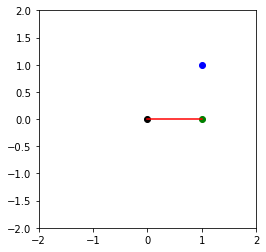

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z = np.zeros((2,))
u = np.array([1.0, 1.0])
v = np.array([1.0, 0.0])

plt.plot(z[0], z[1], 'ok')
plt.plot(u[0], u[1], 'ob')
plt.plot(v[0], v[1], 'og')

plt.plot([z[0], v[0]], [z[1], v[1]], 'r-')

plt.gca().set_aspect('equal')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

In visualizing vectors, it is often useful to plot them as a line segment pointing from the origin (i.e., the vector \[0,0\]) to the coordinates of the vector of interest. In the cell block below, we define two convenience functions:
* `setup_axes()` sets up a set of unit axes (x and y unit vectors). 
* `plot_vec()` plots input vectors as line segments. 
Execute the code below and try plotting different combinations of the `u` and `v` vectors (or any other 2D vector you like) to see how it works. 

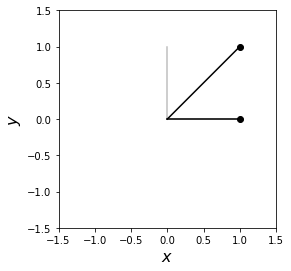

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def setup_axes():
    plt.plot([0,1], [0,0], '-', color=0.75*np.ones((3,)))
    plt.plot([0,0], [0,1], '-', color=0.75*np.ones((3,)))
    
    plt.gca().set_aspect('equal')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.xlabel('$x$', fontsize=16)
    plt.ylabel('$y$', fontsize=16)
    

def plot_vec(vec, flag='k-'): 
    plt.plot([0,vec[0]], [0, vec[1]], flag)
    plt.plot(vec[0], vec[1], 'ko')
    

setup_axes()
plot_vec(u)
plot_vec(v)

# What is a matrix? #

Vectors are in some ways fairly intuitive mathematical objects, since (even in quantum mechanics) they behave in many ways similarly to the 3D vectors that define the coordinates of objects in real space. The concept of the *matrix* plays an equally important role in quantum mechanics but often feels less intuitive at first contact. 

The simplest definition of a matrix is simply that it is a 2D array of numbers. Just as a vector can be thought of as a list of numbers -- with a single index identifying the position of each entry -- a matrix is something like a 2D list, where each entry is characterized by both a "row" and a "column" index. For example,

$$\boldsymbol{M} = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$$

is 3x3 matrix, the first few entries of which are
* $M_{11} = 1$
* $M_{12} = 2$
* $M_{13} = 3$
* $M_{21} = 4$
* $M_{22} = 5$

and so on. At face value, the primary difference between matrices and vectors is that matrices come with two indices, whereas vectors come with only one. (We'll see shortly, though, that matrices have some very interesting -- and not entirely intuitive -- properties that come out handy in quantum mechanics.)

# How are matrices stored/manipulated in Python? #

As you might have guessed, the NumPy package provides a convenient means to store and manipulate matrices. Check the examples below to get a sense for how this works. 

In [3]:
import numpy as np

M = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])


print('M:')
print(M)
print()

Z = np.zeros((3,3))
print('Z:')
print(Z)
print()

A = np.ones((3,3))
print('A:')
print(A)
print()

print('A+M:')
print(A+M)
print()

M:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Z:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

A:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

A+M:
[[ 2.  3.  4.]
 [ 5.  6.  7.]
 [ 8.  9. 10.]]



# Why is matrix multiplication so weird? #

Like vectors, matrices can be added and subtracted "element-wise", i.e., by adding the entries at corresponding positions. Matrix *multiplication* is a bit more complicated. You might think that the most obvious way to multiply two matrices would also be element-wise, i.e., if we have two matrices $\mathbf{A}$ and $\mathbf{B}$ with elements $A_{ij}$ and $B_{ij}$, then the elements in the product $\mathbf{A} \mathbf{B}$ would be simply $A_{ij} B_{ij}$. Although such element-wise products are useful in some contexts, most of the time it is more convenient to use the **matrix product** 
$$ [AB]_{ij} = \sum_k A_{ik} B_{kj} .$$
This may look like an oddly complicated way to define multiplication. To motivate it, let's step back a bit and talk first about *vector* multiplication. 

## Multiplying vectors: the scalar product ##

In 3D space there are two common ways of "multiplying" vectors: the *cross product* and the *dot product*. Perhaps surprisingly, only one of these -- the dot product -- has a simple extension to the many-dimensional vector spaces we work with in quantum mechanics. 

In the linear algebra and quantum mechanics literature, this many-dimensional "dot product" is often referred to as the *scalar product* (to emphasize that two vectors are combined to produce a scalar) or the *inner product* (to distinguish it from the "outer product" in which two vectors are combined to produce a matrix). The outer product is also a very useful quantity in the context of constructing operators, especially *projection operators*, but that's beyond our topic for today. Let's focus for now on the scalar product. 

In general, the scalar product of two vectors is defined by the operation
$$\mathbf{u} \cdot \mathbf{v} = u_1 v_1 + u_2 v_2 + u_3 v_3 + ... = \sum_{k} u_k v_k ,$$
where the sum extends over how ever many dimensions the two vectors possess. (Note that the dimensionality of both vectors must be the same to multiply them!)

The last expression (with the sum over $k$) highlights a connection between the dot product and the matrix product defined earlier. If we think about the first vector $\mathbf{u}$ as a 1xN matrix and the second vector as an Nx1 matrix, then the dot product is just the matrix product between the two: 
$$ \mathbf{u} \cdot \mathbf{v} = \begin{bmatrix} u_1 & u_2 \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \end{bmatrix} $$


## Scalar products in 2D ##

In 2D or 3D space, the scalar product has a simple interpretation as describing *how nearly parallel* the two vectors are. In fact, if the vectors $\mathbf{u}$ and $\mathbf{v}$ have lengths $u$ and $v$, respectively, and form an angle of $\theta$ between them, then 
$$\mathbf{u} \cdot \mathbf{v} = u v \cos(\theta) .$$
If the two vectors are exactly parallel (with $\theta = 0^\text{o}$), the scalar product is simply the product of their lengths; if they are exactly perpendicular ($\theta = 90^\text{o}$), the scalar product is zero; if they are antiparallel ($\theta = 180^\text{o}$), the scalar product is *negative* the product of their lengths.

As an illustration, the code block below defines two unit vectors `u1` and `u2` by the angles `theta1` and `theta2` they make with the horizontal axis. The dot product of the two is the **length of the red dashed line**. Play with the values of `theta1` and `theta2` to see how the dot product varies with the relative angle. 

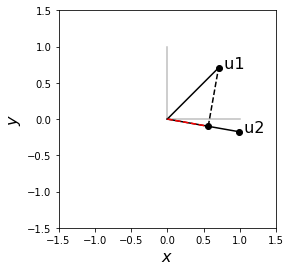

In [6]:
setup_axes()

theta1 = 45.0*(2.0*np.pi/360.0)
u1 = np.array([np.cos(theta1), np.sin(theta1)])

theta2 = -10.0*(2.0*np.pi/360.0)
u2 = np.array([np.cos(theta2), np.sin(theta2)])

dot = np.dot(u1, u2)

plot_vec(u1)
plt.text(u1[0], u1[1], ' u1', fontsize=16)

plot_vec(u2)
plt.text(u2[0], u2[1], ' u2', fontsize=16)
plot_vec(u2*dot, 'r--')
plt.plot([u2[0]*dot, u1[0]], [u2[1]*dot, u1[1]], 'k--')
plt.show()

Why is the scalar product so useful? Because it gives a precise measure of *how closely parallel* two vectors are, it also gives a precise way of determining *how to express one vector as a linear combination of other vectors*. 

To be more specific, if the set of vectors $\{ \mathbf{u}_1, \mathbf{u}_2, \mathbf{u}_3, ... \}$ has the properties that
* each vector is of unit length 
* all vectors are *mutually orthogonal* (i.e., each one is perpendicular to the others) and 
* the number of vectors is the same as the dimensionality of the vector space,
then *any* vector $\mathbf{v}$ can be expressed as 
$$ \mathbf{v} = (\mathbf{u}_1 \cdot \mathbf{v} ) \, \mathbf{u}_1 + (\mathbf{u}_2 \cdot \mathbf{v} ) \, \mathbf{u}_2 + \, ... $$
The properties listed above define $\{ \mathbf{u}_1, \mathbf{u}_2, \mathbf{u}_3, ... \}$ as an *orthonormal complete set*. 

In 2D, any orthonormal complete set must have exactly 2 vectors in it. In the code block below, we define two unit vectors `u1` and `u2` that are orthogonal to each other (i.e., forming an angle of $90^\text{o}$) and thus for a complete orthonormal set. We then plot a third vector `v` and show that the original vector (plotted in green) is the same as the sum-vector (plotted with a red dashed line):
$$ \mathbf{v} = (\mathbf{u}_1 \cdot \mathbf{v} ) \, \mathbf{u}_1 + (\mathbf{u}_2 \cdot \mathbf{v} ) \, \mathbf{u}_2 . $$


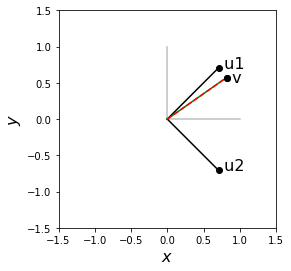

In [9]:
setup_axes()

theta1 = 45.0*(2.0*np.pi/360.0)
u1 = np.array([np.cos(theta1), np.sin(theta1)])

theta2 = theta1-90.0*(2.0*np.pi/360.0)
u2 = np.array([np.cos(theta2), np.sin(theta2)])

# phi is the angle v makes with the x-axis
phi = 35.0*(2.0*np.pi/360.0)
v = np.array([np.cos(phi), np.sin(phi)])

plot_vec(u1)
plt.text(u1[0], u1[1], ' u1', fontsize=16)

plot_vec(u2)
plt.text(u2[0], u2[1], ' u2', fontsize=16)

# ************************************************* #
# Plot v
plot_vec(v, 'g')
plt.text(v[0], v[1], ' v', fontsize=16, va='center')
# ************************************************* #


# ************************************************* #
# Plot v as a sum of its projections onto u1 and u2
plot_vec(np.dot(u1,v)*u1 + np.dot(u2,v)*u2, 'r--')
# ************************************************* #

plt.show()

## Matrix multiplication and scalar products ##

We saw already that it's possible to think of the scalar product as a special case of the matrix product. Now let's see if we can dig up a motivation for the more general matrix product. 

The 2D example we just worked through actually offers a convenient illustration of why the matrix product comes in handy. We just saw that if we want to represent a vector (say $\mathbf{v}$) as a linear combination of two other orthonormal vectors, then we need the two coefficients
$$(\mathbf{u}_1 \cdot \mathbf{v})$$
and
$$(\mathbf{u}_2 \cdot \mathbf{v}) .$$
A useful way to keep track of these coefficients is to store them together in a new vector
$$\tilde {\mathbf{v}} = \begin{bmatrix} (\mathbf{u}_1 \cdot \mathbf{v}) \\ (\mathbf{u}_2 \cdot \mathbf{v}) \end{bmatrix} .$$
Since this new vector $\tilde {\mathbf v}$ provides exactly the same information as the original vector $\mathbf{v}$, we often call it the "transformed" representation of $\mathbf{v}$; as long as we know the two "basis" vectors $\mathbf{u}_1$ and $\mathbf{u}_2$, it's always possible to interconvert (or "transform") back and forth between the two representations. 

Now, here's the important point: the transformed vector $\tilde {\mathbf{v}_3}$ is concisely expressed as the matrix-vector product
$$\tilde {\mathbf{v}} = \begin{bmatrix} (\color{red}{\mathbf{u}_1} \cdot \mathbf{v}) \\ (\color{blue}{\mathbf{u}_2} \cdot \mathbf{v}) \end{bmatrix} = \begin{bmatrix} \color{red}{u_{11}} v_{1} + \color{red}{u_{12}} v_2 \\\color{blue}{u_{21}} v_1 + \color{blue}{u_{22}} v_2 \end{bmatrix} = \begin{bmatrix} \color{red}{\begin{bmatrix} u_{11} & u_{12} \end{bmatrix}} \\\color{blue}{\begin{bmatrix} u_{21} & u_{22} \end{bmatrix}} \end{bmatrix} \begin{bmatrix} v_{1} \\ v_{2} \end{bmatrix} = \begin{bmatrix} \color{red}{u_{11}} & \color{red}{u_{12}} \\ \color{blue}{u_{21}} & \color{blue}{u_{22}} \end{bmatrix} \begin{bmatrix} v_{1} \\ v_{2} \end{bmatrix} \equiv \mathbf{U} \mathbf{v},$$
where we have defined a new *matrix* $\mathbf{U}$ whose *rows* are the basis vectors $\mathbf{u}_1$ and $\mathbf{u}_2$. 

Such a matrix $\mathbf{U}$ (i.e., one whose rows form an orthonormal basis) is called a *unitary matrix*. (In real-valued vector spaces, a unitary matrix is typically called an "orthogonal matrix"; the term "unitary" applies more generally to the complex vector spaces we encounter in quantum mechanics.) 

Thus we find that matrix-vector multiplication arises naturally in the context of what are called "unitary transformations", i.e., the representation of one vector in terms a some particular orthonormal basis. In 2D and 3D, unitary matrices represent operations like rotation and inversion; the "transformed" vector in general has different coordinates but always the same length. Angles and dot products *between* vectors are also preserved by unitary transformations, so long as the same transformation is applied to both vectors. 

In NumPy, the matrix product is denoted by the `@` operator. (The operator `*` represents element-wise multiplication.) The code block below defines a unitary matrix `U` whose rows are just the vectors `v1` and `v2` from the last examplem, if the parameter `theta` is set to $45^\text{o}$. Play with the angle `theta` that defines these two vectors and the angle `phi` that defines the vector `v` to which `U` is applied. What spatial operation does the transformation `U` represent?

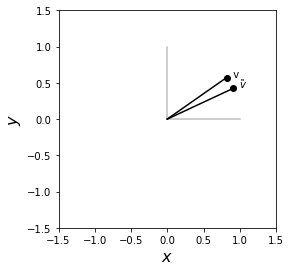

In [10]:
setup_axes()

theta = 10.0*(2.0*np.pi/360.0)
U = np.array([
    [np.cos(theta), np.sin(theta)],
    [-np.sin(theta), np.cos(theta)]
])

# phi is the angle v makes with the x-axis
phi = 35.0*(2.0*np.pi/360.0)
v = np.array([np.cos(phi), np.sin(phi)])

plot_vec(v)
plt.text(v[0], v[1], '  v')

plot_vec(U@v)
plt.text((U@v)[0], (U@v)[1], '  $\\tilde v$')
plt.show()

## Matrix-matrix multiplication ##

Supposing we've convinced you now that matrix-vector multiplication is defined in a sensible way, the question remains: Why is our definition of matrix-*matrix* multiplication sensible? 

We won't go through the mechanics in detail here, but the short answer is because: The standard definition of matrix-matrix multiplication satisfies the property that **the product of two *matrices* acts on a *vector* in exactly the same way as if we applied the two matrices one at a time**. In other words, if we have two matrices $\mathbf{A}$ and $\mathbf{B}$ and a vector $\mathbf{v}$, then
$$ \left( \mathbf{A} \mathbf{B} \right) \mathbf{v} = \mathbf{A} \left(\mathbf{B} \mathbf{v}\right) .$$ 
This *associative property* means that it doesn't matter where we put the parentheses in an expression like this, so we can write without ambiguity simply 
$$\mathbf{A} \mathbf{B} \mathbf{v} = \left( \mathbf{A} \mathbf{B} \right) \mathbf{v} = \mathbf{A} \left(\mathbf{B} \mathbf{v}\right) . $$ 

This property of the matrix product turns out to be essential to the structure of quantum systems. The Schrodinger equation, for example, tells us that the time-dependence of any system can be calculated by the repeated multiplication (with very small -- in principle infinitesimally small -- time steps) of the state vector by the Hamiltonian matrix for the system. The properties of the matrix product allow us to write the *total* time dependence of a system from time zero to time $t$ in terms of the unitary time-evolution operator
$$ e^{-\frac{i}{\hbar} \mathbf{H} t} = \sum_{n=0}^\infty \left( - \frac{i t}{\hbar} \right)^n \frac{\mathbf{H}^n}{n!}, $$
which is itself a sum of (infinitely many) products of the Hamiltonian $\mathbf{H}$ with itself. 


Useful as it may be, a definition like 
$$ [AB]_{ij} = \sum_k A_{ik} B_{kj} $$
still looks a little confusing at first. Expressions like this take some time to get used to, but it may help to think of it as a series of inner products, e.g., as highlighted by the coloring in this 2D example: 
$$ \mathbf{A} \mathbf{B} = \begin{bmatrix} \color{red}{\begin{bmatrix} A_{11} & A_{12} \end{bmatrix}} \\ \color{blue}{\begin{bmatrix} A_{21} & A_{22} \end{bmatrix}} \end{bmatrix} \begin{bmatrix} \color{green}{\begin{bmatrix} B_{11} \\ B_{21} \end{bmatrix}} \color{orange}{\begin{bmatrix} B_{12} \\ B_{22} \end{bmatrix}} \end{bmatrix} = \begin{bmatrix} (\color{red}{A_{11}}\color{green}{B_{11}} + \color{red}{A_{12}} \color{green}{B_{12}}) & (\color{red}{A_{11}}\color{orange}{B_{12}} + \color{red}{A_{12}} \color{orange}{B_{22}}) \\ (\color{blue}{A_{21}}\color{green}{B_{11}} + \color{blue}{A_{22}} \color{green}{B_{12}}) & (\color{blue}{A_{21}}\color{orange}{B_{12}} + \color{blue}{A_{22}} \color{orange}{B_{22}}) \end{bmatrix} .$$
Each element in the *product* matrix is just the inner product between the corresponding *row* of the first matrix and the *column* of the second matrix. Thus the elements a matrix product can be calculated by hand as consecutive "row-by-column, row-by-column, row-by-column, ..." operations.)

The code block below illustrates this principle by comparing the vectors $\mathbf{v}$ with the transformed vectors $\mathbf{U} \mathbf{v}$, $\mathbf{U}^2 \mathbf{v}$, and $\mathbf{U}^3 \mathbf{v}$. 

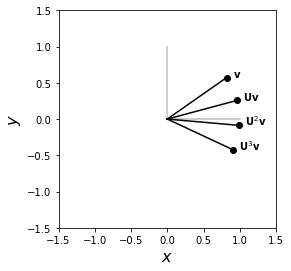

In [11]:
setup_axes()

theta = 20.0*(2.0*np.pi/360.0)
U = np.array([
    [np.cos(theta), np.sin(theta)],
    [-np.sin(theta), np.cos(theta)]
])


# phi is the angle v makes with the x-axis
phi = 35.0*(2.0*np.pi/360.0)
v = np.array([np.cos(phi), np.sin(phi)])

plot_vec(v)
plt.text(v[0], v[1], '  $\\mathbf{v}$')

plot_vec(U@v)
plt.text((U@v)[0], (U@v)[1], '  $\\mathbf{U} \\mathbf{v}$')

plot_vec(U@U@v)
plt.text((U@U@v)[0], (U@U@v)[1], '  $\\mathbf{U}^2 \\mathbf{v}$')

plot_vec(U@U@U@v)
plt.text((U@U@U@v)[0], (U@U@U@v)[1], '  $\\mathbf{U}^3 \\mathbf{v}$')
plt.show()

# What does a unitary matrix do? #

By this point we've already covered the basic properties of unitary matrices, but let's pause here just to summarize them. 
* A unitary matrix is one in which the rows form an orthonormal basis. 
* When a unitary matrix is applied to a vector, its length stays unchanged. 
* When the same unitary matrix is applied to a pair of vectors, their scalar (or "inner") product remains unchanged. 
* Real unitary matrices (i.e., orthogonal matrices) in 2D and 3D correspond to spatial symmetry operations like rotation and inversion. 

### Time to play ###

Our last code block illustrates a 2D *rotation* matrix. See if you can find the right form for a 2D *inversion* matrix that takes each vector $\mathbf{v}$ to its additive inverse $-\mathbf{v}$, i.e., to the vector pointing in the opposite direction. What about the "mirror" matrix that reflects vectors across the $y$ axis? Or the $x$ axis? 

The code block below sets up the problem for you by constructing a unitary matrix and applying it to a vector $\mathbf{v}$. Initially, $\mathbf{U}$ is set to the *identity* matrix 
$$\mathbf{U} = \mathbf{I} \equiv \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} .$$
What do you need to change to produce inversions and reflectsion? 

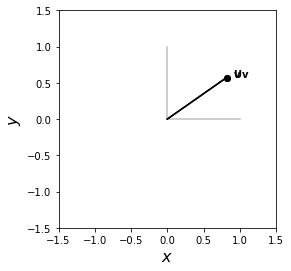

In [12]:
setup_axes()

theta = 20.0*(2.0*np.pi/360.0)
U = np.array([
    [1.0, 0.0],
    [0.0, 1.0]
])


# phi is the angle v makes with the x-axis
phi = 35.0*(2.0*np.pi/360.0)
v = np.array([np.cos(phi), np.sin(phi)])

plot_vec(v)
plt.text(v[0], v[1], '  $\\mathbf{v}$')

plot_vec(U@v)
plt.text((U@v)[0], (U@v)[1], '  $\\mathbf{U} \\mathbf{v}$')

plt.show()

# What does a Hermitian matrix do? #

Hermitian matrices play a central role in quantum mechanics, representing (in a mathematically precise way) various physical observables like position, momentum, and energy. Mathematically, a Hermitian matrix is defined by the property that 
$$ A_{mn} = A_{nm}^*,$$
i.e., that the matrix is equal to its *conjugate transpose* or "Hermitian conjugate". While unitary transformations have an intuitive interpretation in terms of rotations and inversions in real space, Hermitian matrices can feel more difficult to get ahold of conceptually. 

To build some intuition here, the code block below plots a series of data points both *before* (in gray) and *after* (black) applying multiplication by a matrix $\mathbf{A}$. By default $\mathbf{A}$ is set to the identity $\mathbf{I}$. Try running the code with $\mathbf{A}$ initialized to each of the following values:

* The *Hermitian* matrices

$$\mathbf{A} = \begin{bmatrix} 1 & 0 \\ 0 & 2 \end{bmatrix}$$

$$\mathbf{A} = \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix}$$

$$\mathbf{A} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

$$\mathbf{A} = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$

$$\mathbf{A} = \begin{bmatrix} 1 & 0.5 \\ 0.5 & 1 \end{bmatrix}$$

* The *unitary* rotation matrix $\mathbf{U}$ defined in the last code block, i.e., with
    $$\mathbf{A} = \begin{bmatrix}\cos\theta & \sin\theta \\-\sin\theta & \cos\theta \end{bmatrix}$$
    
What do each of these operations do to the image plotted in the figure? If a unitary matrix corresponds to rotations or inversions, what does a Hermitian matrix represent? (Note that two of the Hermitian matrices identified above are *also* unitary matrices. Can you see which ones?)

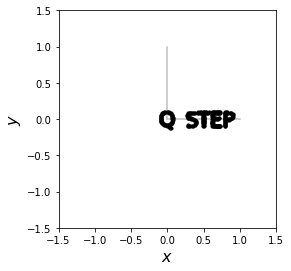

In [13]:
setup_axes()

A = np.array([
    [1.0, 0],
    [0, 1.0]
])

vecs = np.loadtxt('data.txt')

for vec in vecs:
    plt.plot((vec)[0], (vec)[1], '.', color=0.75*np.ones((3,)))
    
for vec in vecs:
    plt.plot((A@vec)[0], (A@vec)[1], '.k')

plt.show()

Hopefully these examples have led you to the following observation: in 2D or 3D real space, Hermitian matrices correspond to *stretching* or *compressing* vectors along a specific set of axes. A diagonal Hermitian matrix corresponds to stretching or compressing along the Cartesian coordinate axes $x$ and $y$, while Hermitian matrices that have off-diagonal elements correspond to stretching or compressing along other orthonormal axes. We'll learn about exactly *which* axes get stretched and compressed in the next section. 



# What are eigenvectors? #

Finally, you may be aware that something called "eigenvectors" play a special role in quantum mechanics. What are these creatures? 

Mathematically, an eigenvector $\mathbf{v}$ of a matrix $\mathbf{A}$ is defined by the property that multiplying $\mathbf{v}$ by $\mathbf{A}$ produces no change other than scaling the vector by a constant value $\lambda$, which is called the "eigenvalue". In other words, if $\mathbf{v}$ is an eigenvalue of $\mathbf{A}$ with eigenvalue $\lambda$, then
$$ \mathbf{A} \mathbf{v} = \lambda \mathbf{v} . $$

In quantum mechanics, a central role is played by the eigenvalues of Hermitian operators. As such, much important physics is embedded in the following *mathematical* properties of Hermitian operators:
* Their eigenvalues are all real. 
* Eigenvectors with different eigenvalues are always orthogonal. 
* Their eigenvectors span the entire vector space. 

Together, these three properties ensure 
1. that measured values for physical quantities are always real and 
2. that we can always describe the state of a system in terms of whatever physical property happens to be of interest to us. 

In real-space, the eigenvectors of a Hermitian matrix correspond to the *unit axes along which the Hermitian "distortion" of space produces no change in direction*: i.e., vectors that point in the same direction after multiplication by their corresponding Hermitian matrix. To get a sense for what eigenvalues represent in real 2D space, the code below plots a single vector `vec` both before and after multiplication by a Hermitian operator $\mathbf{A}$. Try a few different definitions for $\mathbf{A}$ and see if you can find at least one eigenvector in each case. What are the corresponding eigenvalues? 



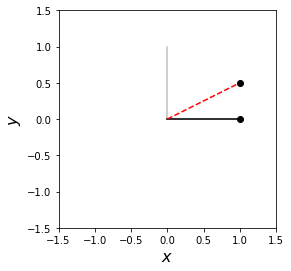

In [14]:
setup_axes()

A = np.array([
    [1.0, 0.5],
    [0.5, 1.0]
])

vec = np.array([1.0, 0.0])

plot_vec(vec, 'k')
    
plot_vec((A@vec), 'r--')

plt.show()

## Matrix diagonalization ##

Fortunately, for numerical calculations, you don't need to find eigenvectors by trial and error. The NumPy library provides a whole suite of commands for finding eigenvectors under various conditions. For our purposes, the most convenient command will be ``np.linalg.eigh()``, which calculates eigenvalues and eigenvectors for Hermitian operators. The command 

``evals, evecs = np.linalg.eigh(A)``

in the code block produces a vector called ``evals`` that stores the eigenvalues of $\mathbf{A}$ and a matrix ``evecs`` whose *columns* store the eigenvectors of $\mathbf{A}$. The figure plots these two eigenvectors in black and then the rescaled eigenvector $\mathbf{A}\mathbf{v}$ in red or blue dashed lines. (You can check for yourself that the plotted vector ``A@evecs[:,n]`` is identical to the scaled vector ``evals[n]*evecs[:,n]``.)


Eigenvalues: 
[0.21922359 2.28077641]

Eigenvectors:
[[-0.78820544  0.61541221]
 [ 0.61541221  0.78820544]]



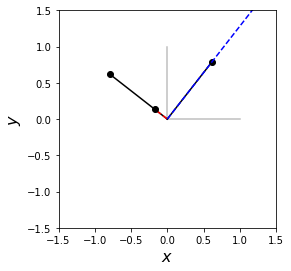

In [15]:
setup_axes()

A = np.array([
    [1.0, 1.0],
    [1.0, 1.5]
])

evals, evecs = np.linalg.eigh(A)


print('Eigenvalues: ')
print(evals)
print()

print('Eigenvectors:')
print(evecs)
print()

colors = ['r', 'b']
for n in range(0, 2):
    vec = evecs[:,n]
    plot_vec(vec, 'k')
    
    plot_vec((A@vec), colors[n] + '--')

plt.show()


# How does all this relate to wave functions? #

Finally, let's talk about the relationship between the "matrix mechanics" that we've been describing and the "wave mechanics" that you probably encountered in your first exposure to quantum mechanics. Simply put: what do matrices and vectors have to do with wave functions? 

The answer (it turns out) is: a lot! The key to understanding this relationship is to recognize that we can add and subtract *functions* (say $f(x)$) in just the same way we can add and subtract *vectors*. We can also *scale* functions by real or complex numbers, just like vectors. We can measure the "size" of a function (just like the length of a vector) by checking the area under the curve or (since functions can be negative-valued and even complex) the area under the *absolute-value-squared* curve:
$$ \left \| f \right \|^2 = \int_{-\infty}^\infty \left |f(x) \right |^2 dx .$$
Perhaps less obvious is that we can even calculate "dot products" (or inner products) between functions by integrating them against each other: 
$$ \left < f | g \right> = \int_{-\infty}^\infty f^*(x) g(x) dx .$$
For inner products between functions, the notation $\left < f | g \right>$ is common in the physics literature, while $(f,g)$ is more common in mathematics.

The point of all this is that functions have all the properties needed to form a vector space:
* They can be added and subtracted. 
* They can be scaled by real or complex numbers. 
* They have a "size" -- or in technical terms a "norm".
* They have a well-defined inner product. 

Thanks to these properties, it is possible to construct a one-to-one "mapping" between the many-dimensional vector space of quantum matrix mechanics and the many-dimensional "function space" of wave mechanics. (This demonstration was Schrodinger's second great contribution to quantum mechanics; his first was the Schrodinger equation itself.) 

In the example below, we'll give just a brief glimpse at this wave-vector duality through a dynamic illustration of a quantum harmonic oscillator (i.e., a quantum spring). In wavefunction terms, the state of the system will initially be a superposition of the ground and first-excited states of the oscillator:
$$\psi(x; t=0) = f^{\frac{1}{2}} \psi_0(x) + (1-f)^{\frac{1}{2}} \psi_1(x) . $$ 
The factor $f$ determines with what probability the molecule is in the ground state (probabilty = $f$) or the excited state (probability = $1 - f$). In "wave mechanics" terms, the function $\psi(x)$ gives us the *probability amplitude* for where we might find the particle if we measured its position. 


In "matrix mechanics", we can represent *the same information* (if you know how to "decode it", i.e., if you have the correct Hermitian matrix corresponding to the position operator) by means of a vector that stores the $\psi_0$ and $\psi_1$ coefficients:
$$ \left | \psi(0) \right> = \begin{bmatrix} \sqrt{f} \\ \sqrt{1-f} \end{bmatrix} .$$
(The notation $\left | \psi(0) \right>$ is called bra-ket notation and is common in physics applications.) 

As the system changes in time, the Schrodinger equation tells us that it will evolve as 
$$\psi(t) = f^{\frac{1}{2}} e^{-i \frac{\omega}{2} t} \psi_0 + (1-f)^{\frac{1}{2}} e^{-i \frac{3\omega}{2} t} \psi_1 , $$
with the complex coefficients $e^{-i \frac{\omega}{2} t}$ and $e^{-i \frac{3 \omega}{2} t}$ indicating the evolving *phase* of each state, as determined by their relative energies $\frac{\omega}{2}$ and $\frac{3\omega}{2}$. In vector form, this means that our state vector evolves as 
$$ \left | \psi(t) \right> = \begin{bmatrix} e^{-i \frac{\omega}{2} t} \sqrt{f} \\ e^{-i \frac{3 \omega}{2} t} \sqrt{1-f} \end{bmatrix} .$$
This vector-space time evolution can also be described by the application of a unitary *time-evolution operator* $\mathbf{U}(t)$ to the initial state vector $\left | \psi(0) \right >$, i.e., 
$$\left | \psi(t) \right > = \mathbf{U(t)} \left | \psi(0) \right >,$$
where
$$ \mathbf{U}(t) = \begin{bmatrix} e^{-i \frac{\omega}{2} t} & 0 \\ 0 & e^{-i \frac{3 \omega}{2} t} \end{bmatrix} . $$

Thus the evolution of the quantum system can be described *either* in terms of a time-evolving wavefunction (which describes the probability of finding the particle at a particular *place*) or a time-evolving "state vector" (which describes the probability of finding the system in a particular *energy state*). Note that in both cases, the system state is a complex quantity -- it has both an amplitude *and a phase*, which allows for more information to be encoded in the system state that would be allowed in a purely real wave function or state vector. 

The code block below illustrates these two pictures. The left-hand panel shows the evolution of the real and imaginary parts of the state vector with $f = 0.5$. The right-hand panel shows the evolution of the probablity density (green curve), with the evolving basis vectors $e^{-i \frac{\omega}{2} t} \psi_0(x)$ and $e^{-i \frac{3\omega}{2} t} \psi_1$ shown for comparison. 

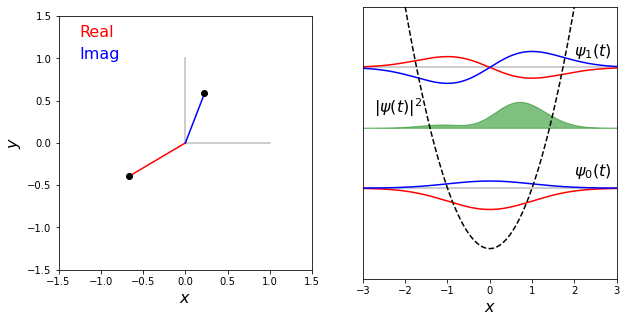

In [16]:
from IPython import display

xaxis = np.arange(-5, 5, 0.01)

V = 0.5*xaxis**2


psi0 = (1.0/np.power(np.pi, 0.25))*np.exp(-xaxis**2/2.0)
psi1 = (np.sqrt(2.0)/np.power(np.pi, 0.25))*xaxis*np.exp(-xaxis**2/2.0)

f=0.5

# This is the state vector at t = 0
vec0 = np.array([np.sqrt(f), np.sqrt(1-f)])
print(np.shape(vec))

plt.figure(figsize=(10,5))

scale = 0.35
for t in np.arange(0, 20, 0.5):
    
    plt.clf()
    
    U = np.array([
        [np.exp(-0.5*1j*t), 0],
        [0.0, np.exp(-1.5*1j*t)]
    ])
    
    vec = U@vec0
    
#     print(U)
    
    psi = vec[0]*psi0 + vec[1]*psi1

    
    plt.subplot(1,2,1)
    setup_axes()
    plot_vec(np.real(vec), 'r')
    plot_vec(np.imag(vec), 'b')
    plt.text(-1.25, 1.25, 'Real', color='r', fontsize=16)
    plt.text(-1.25, 1.0, 'Imag', color='b', fontsize=16)
    
    plt.subplot(1,2,2)

    # psi0 contribution
    plt.plot(xaxis, 0*xaxis+0.5, color=0.75*np.ones((3,)))
    plt.plot(xaxis, scale*np.real(vec[0]*psi0)+0.5, 'r')
    plt.plot(xaxis, scale*np.imag(vec[0]*psi0)+0.5, 'b')
    
    # psi1 contribution
    plt.plot(xaxis, 0*xaxis+1.5, color=0.75*np.ones((3,)))
    plt.plot(xaxis, scale*np.real(vec[1]*psi1)+1.5, 'r')
    plt.plot(xaxis, scale*np.imag(vec[1]*psi1)+1.5, 'b')
    
    plt.fill_between(xaxis, scale*np.abs(psi)**2+(f*0.5+(1-f)*1.5), 0*xaxis+(f*0.5+(1-f)*1.5), color='g', alpha=0.5)
    
    plt.text(-2.75, (f*0.5+(1-f)*1.5)+0.125, '$|\\psi(t)|^2$', fontsize=16)
    
    plt.plot(xaxis, V, 'k--')
    plt.xlim(-3,3)
    plt.ylim(-0.25, 2)
    plt.yticks([])
    plt.text(2, 1.6, '$\psi_1(t)$', fontsize=16)
    plt.text(2, 0.6, '$\psi_0(t)$', fontsize=16)
    plt.xlabel('$x$', fontsize=16)
    display.display(plt.gcf())
    display.clear_output(wait=True)